# Task
Predict which users will purchase the product, given the actions they've taken

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import classification_report

%matplotlib inline

In [185]:
def make_training_data():
    train = pd.read_table('train.tsv', sep='\t', names=['user_id', 'activity_date', 'activity_type'])
    dummies = pd.get_dummies(train['activity_type'])
    expanded = pd.concat([train, dummies], axis=1)
    stats = expanded.groupby('user_id', as_index=False).agg({'EmailClickthrough': 'sum',
                                     'EmailOpen': 'sum',
                                     'FormSubmit': 'sum',
                                     'PageView': 'sum',
                                     'WebVisit':'sum',
                                     'Purchase': 'sum'})

    # Flatten
    stats['Purchase'] = stats['Purchase'].apply(lambda x: 1 if x > 0 else 0)
    stats['PageView'] = stats['PageView'].apply(lambda x: 1 if x > 0 else 0)
    stats['EmailClickthrough'] = stats['EmailClickthrough'].apply(lambda x: 1 if x > 0 else 0)
    stats['FormSubmit'] = stats['FormSubmit'].apply(lambda x: 1 if x > 0 else 0)
    stats['EmailOpen'] = stats['EmailOpen'].apply(lambda x: 1 if x > 0 else 0)
    stats['WebVisit'] = stats['WebVisit'].apply(lambda x: 1 if x > 0 else 0)

    # Many of these users have no activity but have a purchase
    # And they don't exist in the test data
    # Clean them out!
    stats['Activity'] = stats['PageView'] + stats['EmailClickthrough'] + stats['FormSubmit'] + stats['EmailOpen'] + stats['WebVisit']
    idx = stats['Activity'] > 0
    stats = stats.loc[idx, :].reset_index()
    return stats

In [186]:
# Logistic Regression across entire training set
X = stats[['PageView', 'EmailClickthrough', 'FormSubmit', 'EmailOpen', 'WebVisit']]
Y = stats['Purchase']

model = LogisticRegression(class_weight='balanced')
model.fit(X, Y)
stats['Prediction'] = model.predict(X)

print 'Intercept: ', model.intercept_
print 'Coefficients: \n', model.coef_
print classification_report(stats['Purchase'], stats['Prediction'])

Intercept:  [-1.4871469]
Coefficients: 
[[ 1.08734587  0.71867778  0.38169149  0.95174482 -0.27105164]]
             precision    recall  f1-score   support

          0       0.91      0.74      0.82    237577
          1       0.27      0.57      0.37     40646

avg / total       0.82      0.72      0.75    278223



In [187]:
# Logistic Regression with KFold cross-validation
skf = StratifiedKFold(stats['Purchase'], 10)
models = []

for train_idx, test_idx in skf:  
    model = LogisticRegression(class_weight='balanced')
    model.fit(X.loc[train_idx,:], Y.loc[train_idx])
    predictions = model.predict(X.loc[test_idx,:])
    print classification_report(Y.loc[test_idx],predictions)
    models.append(clf)

             precision    recall  f1-score   support

          0       0.91      0.73      0.81     23758
          1       0.27      0.59      0.37      4065

avg / total       0.82      0.71      0.75     27823

             precision    recall  f1-score   support

          0       0.91      0.73      0.81     23758
          1       0.27      0.58      0.37      4065

avg / total       0.82      0.71      0.75     27823

             precision    recall  f1-score   support

          0       0.91      0.74      0.81     23758
          1       0.27      0.56      0.36      4065

avg / total       0.81      0.71      0.75     27823

             precision    recall  f1-score   support

          0       0.91      0.74      0.82     23758
          1       0.27      0.58      0.37      4065

avg / total       0.82      0.71      0.75     27823

             precision    recall  f1-score   support

          0       0.91      0.74      0.82     23758
          1       0.28      0.58 

([array([  7.29360000e+04,   0.00000000e+00,   1.86900000e+04,
           0.00000000e+00,   6.00000000e+00,   4.50700000e+04,
           0.00000000e+00,   1.95628000e+05,   0.00000000e+00,
           9.23800000e+03]),
  array([  9.23800000e+03,   0.00000000e+00,   1.95628000e+05,
           0.00000000e+00,   4.50700000e+04,   6.00000000e+00,
           0.00000000e+00,   1.86900000e+04,   0.00000000e+00,
           7.29360000e+04])],
 array([ 0.0133555,  0.1106844,  0.2080133,  0.3053422,  0.4026711,
         0.5      ,  0.5973289,  0.6946578,  0.7919867,  0.8893156,
         0.9866445]),
 <a list of 2 Lists of Patches objects>)

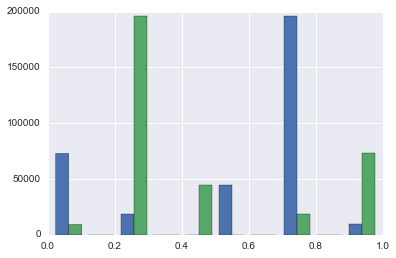

In [95]:
probabilities = pd.DataFrame(model.predict_proba(X))
plt.hist(probabilities)

In [183]:
# DecisionTreeClassifier
from sklearn import tree

X = stats[['PageView', 'EmailClickthrough', 'FormSubmit', 'EmailOpen', 'WebVisit']]
Y = stats['Purchase']

clf = tree.DecisionTreeClassifier(class_weight='balanced')
clf = clf.fit(X, Y)
stats['Prediction'] = clf.predict(X)
print classification_report(stats['Purchase'], stats['Prediction'])

             precision    recall  f1-score   support

          0       0.92      0.84      0.88    237577
          1       0.39      0.57      0.46     40646

avg / total       0.84      0.80      0.82    278223



In [110]:
X = stats[['PageView', 'EmailClickthrough', 'FormSubmit', 'EmailOpen', 'WebVisit']]
Y = stats['Purchase']

In [188]:
# Decision tree with KFold

from sklearn.cross_validation import StratifiedKFold
skf = StratifiedKFold(stats['Purchase'], 10)
models = []
for train_idx, test_idx in skf:      
    clf = tree.DecisionTreeClassifier(class_weight='balanced')
    clf = clf.fit(X.loc[train_idx,:], Y.loc[train_idx])
    predictions = clf.predict(X.loc[test_idx,:])
    print classification_report(Y.loc[test_idx],predictions)
    models.append(clf)

             precision    recall  f1-score   support

          0       0.92      0.70      0.80     23758
          1       0.26      0.62      0.37      4065

avg / total       0.82      0.69      0.73     27823

             precision    recall  f1-score   support

          0       0.91      0.70      0.79     23758
          1       0.26      0.62      0.37      4065

avg / total       0.82      0.69      0.73     27823

             precision    recall  f1-score   support

          0       0.91      0.71      0.80     23758
          1       0.26      0.60      0.36      4065

avg / total       0.82      0.69      0.73     27823

             precision    recall  f1-score   support

          0       0.91      0.71      0.80     23758
          1       0.26      0.61      0.37      4065

avg / total       0.82      0.69      0.73     27823

             precision    recall  f1-score   support

          0       0.92      0.71      0.80     23758
          1       0.27      0.62 

In [189]:
# Pick the best model
best_model = models[0]
best_model

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

([array([  6.33450000e+04,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   2.39310000e+04,
           7.70000000e+01,   3.90160000e+04,   3.23290000e+04,
           1.82870000e+05]),
  array([  1.82870000e+05,   3.22940000e+04,   3.90510000e+04,
           7.70000000e+01,   2.39310000e+04,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           6.33450000e+04])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 2 Lists of Patches objects>)

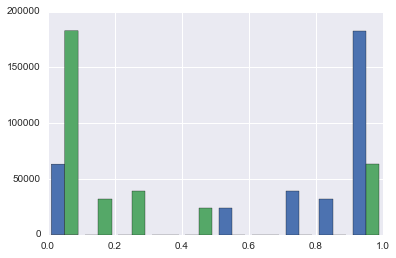

In [92]:
# Tree has more confidence and bigger separation
probabilities = pd.DataFrame(clf.predict_proba(X))
plt.hist(probabilities)

In [190]:
def make_test_data():
    test = pd.read_table('test.tsv', sep='\t', names=['user_id', 'activity_date', 'activity_type'])
    dummies = pd.get_dummies(test['activity_type'])
    expanded = pd.concat([test, dummies], axis=1)
    stats = expanded.groupby('user_id', as_index=False).agg({'EmailClickthrough': 'sum',
                                     'EmailOpen': 'sum',
                                     'FormSubmit': 'sum',
                                     'PageView': 'sum',
                                     'WebVisit':'sum'})


    stats['PageView'] = stats['PageView'].apply(lambda x: 1 if x > 0 else 0)
    stats['EmailClickthrough'] = stats['EmailClickthrough'].apply(lambda x: 1 if x > 0 else 0)
    stats['FormSubmit'] = stats['FormSubmit'].apply(lambda x: 1 if x > 0 else 0)
    stats['EmailOpen'] = stats['EmailOpen'].apply(lambda x: 1 if x > 0 else 0)
    stats['WebVisit'] = stats['WebVisit'].apply(lambda x: 1 if x > 0 else 0)
    stats['Activity'] = stats['PageView'] + stats['EmailClickthrough'] + stats['FormSubmit'] + stats['EmailOpen'] + stats['WebVisit']
    return stats

In [206]:
# Make final ranking
features = stats[['PageView', 'EmailClickthrough', 'FormSubmit', 'EmailOpen', 'WebVisit']]
final = pd.concat([stats, pd.DataFrame(best_model.predict_proba(features))], axis=1)
test_users = final.sort(1, ascending=False)
hello = test_users[['user_id', 1]]
hello.rename(columns={1:'score'}, inplace=True)
hello.to_csv('test_users.tsv', sep='\t', index=False)